In [ ]:
import numpy as np
import hw6_utils
from hw6_utils import load_MNIST

np.random.seed(2024)

batch_size = 32

normalize_vals = (0.1307, 0.3081)

# load MNIST dataset
train_dataset, test_dataset, train_loader, test_loader = load_MNIST(batch_size, normalize_vals)

**Build CNN**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 20, kernel_size = 3, stride = 1, dilation = 1, bias = True) # convolution layer
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2) # max pooling
    self.dropout = nn.Dropout(p = 0.5) # dropout layer

    self.fc1 = nn.Linear(in_features = 20 * 13 * 13, out_features = 128) # fully connected layer 1
    self.fc2 = nn.Linear(in_features = 128, out_features = 10) # fully connected layer 2

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x))) # apply convolution, relu, pool
    x = self.dropout(x) # apply dropout
    x = torch.flatten(x, 1) # flatten
    x = F.relu(self.fc1(x)) # apply relu to fully connected layer 1
    x = self.dropout(x) # apply dropout again
    x = self.fc2(x) # apply relu to fully connected layer 2
    return x

net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters())

for epoch in range(8):

  # training phase
  net.train()

  # initialize summary statistics
  running_train_loss = 0.0
  correct_train_predictions = 0
  total_train_predictions = 0

  # loop through training data
  for i, data in enumerate(train_loader, 0):

    # get the inputs
    inputs, labels = data

    # zero out the parameter gradients
    optimizer.zero_grad()

    # forward, backward, and then optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # accumulate info to summary statistics
    running_train_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    total_train_predictions += labels.size(0)
    correct_train_predictions += (predicted == labels).sum().item()

    train_loss = running_train_loss / len(train_loader)
    train_error = 1 - correct_train_predictions / total_train_predictions

    # evaluation phase
    net.eval()

    # initialize summary statistics
    running_test_loss = 0.0
    correct_test_predictions = 0
    total_test_predictions = 0

  # compute test predictions
  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      outputs = net(images)
      loss = criterion(outputs, labels)
      running_test_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      total_test_predictions += labels.size(0)
      correct_test_predictions += (predicted == labels).sum().item()

  test_loss = running_test_loss / len(test_loader)
  test_error = 1 - correct_test_predictions / total_test_predictions

  # print summary statistics
  print(f'Epoch: {epoch}')
  print(f'Train Loss: {train_loss}')
  print(f'Train Error: {train_error}')
  print(f'Test Loss: {test_loss}')
  print(f'Test Error: {test_error}')



print('Finished Training')

PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

Epoch: 0
Train Loss: 0.9235468217730523
Train Error: 0.20299999999999996
Test Loss: 0.40809471160173416
Test Error: 0.10909999999999997
Epoch: 1
Train Loss: 0.3643887309273084
Train Error: 0.10124999999999995
Test Loss: 0.3083455439347524
Test Error: 0.08630000000000004
Epoch: 2
Train Loss: 0.3026581007540226
Train Error: 0.0869833333333333
Test Loss: 0.26953066606967213
Test Error: 0.0776
Epoch: 3
Train Loss: 0.2689956039249897
Train Error: 0.07796666666666663
Test Loss: 0.24321220117136122
Test Error: 0.07099999999999995
Epoch: 4
Train Loss: 0.2439123853156964
Train Error: 0.0702166666666667
Test Loss: 0.22231752265054291
Test Error: 0.0655
Epoch: 5
Train Loss: 0.22316654348274073
Train Error: 0.06398333333333328
Test Loss: 0.20453669005832353
Test Error: 0.06000000000000005
Epoch: 6
Train Loss: 0.20544747035553057
Train Error: 0.05864999999999998
Test Loss: 0.1891803349808644
Test Error: 0.05449999999999999
Epoch: 7
Train Loss: 0.18986423053046067
Train Error: 0.054200000000000026
T

In [ ]:
# see how the network performs on the test set
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data

    # calculate outputs by running images through the network
    outputs = net(images)

    # the class with the highest energy is the prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f"Accuracy of the network: {correct / total}")

Accuracy of the network: 0.9497


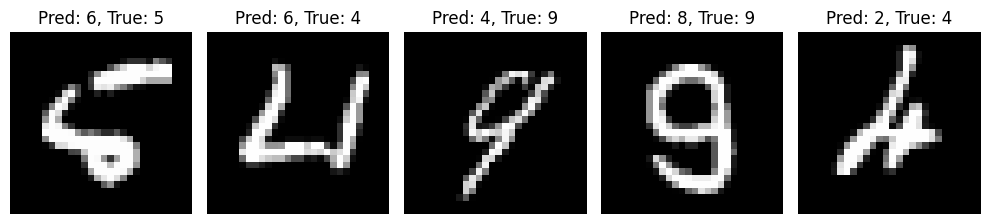

In [ ]:
import matplotlib.pyplot as plt

# track misclassified images
misclassified = []
max_to_show = 5

for inputs, labels in test_loader:
    # get predictions from the model
    outputs = net(inputs)
    _, predicted = torch.max(outputs, 1)

    # find misclassified indices
    misclass_indices = (predicted != labels).nonzero(as_tuple=True)[0]

    # collect misclassified images and their details
    for idx in misclass_indices:
        if len(misclassified) < max_to_show:
            misclassified.append((inputs[idx], predicted[idx], labels[idx]))
        else:
            break

    if len(misclassified) >= max_to_show:
        break

# plot the misclassified images
plt.figure(figsize=(10, 10))
for i, (image, pred, true) in enumerate(misclassified):
    plt.subplot(1, len(misclassified), i + 1)
    # Convert the tensor to a numpy array if needed
    plt.imshow(image.permute(1, 2, 0).cpu().numpy(), cmap="gray")  # Assumes channel-first
    plt.title(f"Pred: {pred.item()}, True: {true.item()}")
    plt.axis("off")
plt.tight_layout()
plt.show()


### Answer the text questions here

To begin building the CNN, we had to load in the MNIST data using the given helper function and we chose an arbitrary batch size and made sure that the values were normalized. Normalizing the data doesn't allow for any of the pixels in the image to have a value outside of the range [0,1].

Following the characteristics of building the network, we were able to build the framework for the net and move onto the training phase. I decided to choose 8 epochs because the change in loss was decreasing much slower while the accuracy was also improving by the time we had hit the final epoch. I also tried 10-15 epochs as well, but felt like the change was too small and could lead to overfitting in the end. For each epoch, we could see the summary statistics of train/test loss and train/test accuracy to get a feel for how our model was fitting the data. To get these statistics, we had to zero out the gradients, use cross entropy to compute the loss, backpropagate, and finally use stochastic gradient descent to optimize the network. The accuracy for our network was pretty high at about 95%.

Despite our modeling having a really high accuracy, there were some misclassifications as expected. Let's dive into why the network may have made incorrect predictions for each image.

Image 1: This is a poorly written digit and could go either way. If the lines were connected at the top like they should be, I would have thought it was a six as well.

Image 2: I am not sure why the model predicted a six here, this image doesn't share many similarities and characteristics of a six.

Image 3: With the top of the digit not being connected, this could easily have looked like a four to the model. The human eye would call that a nine, but again not a poor error.

Image 4: This is a really poor nine as it shares a lot of characteristics that an eight should have. The lines are almost fully connected with the two loops that an eight would have. Not a bad miss here either.

Image 5: I am assuming multiple classes had pretty even probabilities here as this digit doesn't seem to have correlation with any digit from the human eye.

Overall, the models performance was really good at almost 95%. After analyzing some of the misclassifications a lot of them would have been really tough for the model to pick up and the model did a good job of getting as close as possible with near misses (classifying a four as a nine).

---

### **Problem 2. (25 points)** In this problem, your task is to apply principal component analysis (PCA) to the MNIST dataset to reduce the dimensionality of each image from 784 to 2 and visualize the images in the lower-dimensional subspace. Apply PCA to all the training data to learn the projection vector. Then, project each image in the training dataset to $\mathbb{R}^2$. Use the provided plotting function `plot_points()` (in `hw6_utils.py`) to plot each projected image as a point in a 2-dimensional figure where the x-axis is principal component 1 and the y-axis is principal component 2. Color each point in the figure according to the label of each image so we can visualize how well PCA reduced the dimensionality according to how closely the images are grouped by label. (Note, only use the labels to visualize how well PCA did, do not use the labels anywhere else.) What are your observations from the figure? Where did PCA reduce the dimensionality well and where did it not do well? Note, you may get some complex numbers when computing the eigenvalues and eigenvectors. You can use `np.real()` to only keep the real part.


### Write your code and display your figures here

In [ ]:
from hw6_utils import load_MNIST, convert_data_to_numpy, plot_points

np.random.seed(2024)

normalize_vals = (0.1307, 0.3081)

batch_size = 100

# load MNIST dataset
train_dataset, test_dataset, train_loader, test_loader = load_MNIST(batch_size, normalize_vals)

# convert to numpy
X, y = convert_data_to_numpy(train_dataset)

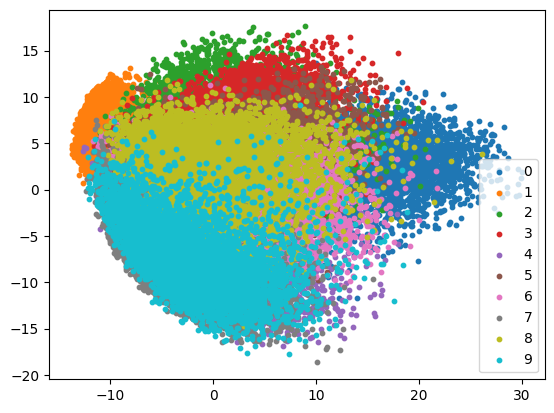

In [ ]:
from sklearn import decomposition
import matplotlib.pyplot as plt

# define number of clusters
num_clusters = 2

# apply PCA to data
pca = decomposition.PCA(n_components = num_clusters)
pca.fit(X)
X_pca = pca.transform(X)

# extract points for x and y axes
points_x = X_pca[:, 0]  # principal component 1
points_y = X_pca[:, 1]  # principal component 2

# use the updated plot_points function
plot_points(points_x, points_y, y, "pca_mnist_projection.png")

### Answer the text questions here

As you can see from the figure, there are some well defined classes and some poorly defined classes. PCA classifies zeros, ones, twos, and eights pretty well. Whereas it makes some mistakes with numbers that are similar such as sixes and nines or sevens and nines. I can make these conclusions based on looking at overlaps between the colors which signify misclassifications. In a perfect world, each class would be seperate and there would be no clear overlap. Overall, PCA does a pretty good job considering that the dimensionality is reduced from 784 to 2.

---

## Extra Credit Problems

### In order for extra credit solutions to be considered, you must provide reasonable solutions to all parts of Problems 1 and 2 above. If you skip any part of a problem or do not provide a reasonable solution, we will not count any extra credit towards your grade.

---

### **Extra Credit 1. (3 points)** Describe how to split the data to train a machine learning model (e.g., SVM). Make sure to describe two ways, one using cross validation and another without using cross validation. Explain why we split the data in these ways and what can happen if the data is split incorrectly.

### Answer the questions here

**Non Cross-Validation Method:**

Use a train-test split to divide the data into a training piece and a piece to evaluate how good your model is (test). We split the data this way to allow the model to learn from the training data so that it can be tested without having any bias on the test set. If the data is split incorrectly, the model will almost definitely overfit and will perform poorly on unseen data.

**Cross-Validation Method:**

Use cross-validation to split the data into a chosen number of folds. This splits the data into k-1 training sets and one test set and repeats this until all of the data has been accounted for. You train the model on the training set and then check its performance on the test set. This method reduces bias and allow the entire dataset to be utilized. If the data is split incorrectly and their is overlapping information or imbalance data, the model can severly overfit.

---

### **Extra Credit 2. (10 points)** In this problem, your task is to segment an image using $k$-means. We can use $k$-means to cluster pixels with similar (color) values together to generate a segmented or compressed version of the original image. Apply $k$-means to the provided image `umn_csci.png`. For each $k=\{3,5,7\}$, generate a segmented image and compute the cumulative loss (i.e., distortion measure from the lecture notes). (Note, it may be helpful to test on a smaller version of the image `umn_csci.png` to ensure your code works but report final results on the full version.)

### Write your code and display your figures here

Loss for 7 clusters: 2318.486073896538
Loss for 5 clusters: 4282.275646632187
Loss for 3 clusters: 10017.07618337186


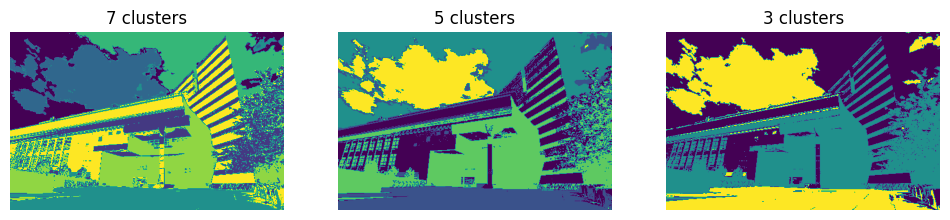

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# k-values
estimators = [
    ("k_means_umn_7", KMeans(n_clusters=7)),
    ("k_means_umn_5", KMeans(n_clusters=5)),
    ("k_means_umn_3", KMeans(n_clusters=3)),
]

# load image and reshape
image = plt.imread("umn_csci.png")
image_data = image.reshape(-1, image.shape[-1])

fig = plt.figure(figsize=(12, 10))
titles = ["7 clusters", "5 clusters", "3 clusters"]

for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(1, 3, idx + 1)
    est.fit(image_data)
    labels = est.labels_

    # centroids
    centroids = est.cluster_centers_

    # compute the loss
    loss = 0
    for i in range(image_data.shape[0]):  # iterate over each data point
        centroid = centroids[labels[i]]  # get the centroid for the assigned cluster
        loss += np.sum((image_data[i] - centroid) ** 2)  # distance from centroid

    # print the loss
    print(f"Loss for {title}: {loss}")

    # reshape the labels back to the original shpae
    reshaped_image = labels.reshape(image.shape[:-1])

    # display the image with the respective clusters
    ax.imshow(reshaped_image)
    ax.set_title(title)
    ax.axis("off")

plt.show()

---

### For all problems, make sure to write and submit clean, working code. Reminder, you cannot use ChatGPT or similar technologies. Please see the syllabus for more details.